# Python y estadística en Análisis Financiero (2)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  #

### Vamos a construir una estrategia de trading simple utilizando el mismo archivo que en el notebook (1). Definimos las mismas variables MA(10) y MA(50) que habíamos definido anteriormente:

In [3]:
fbook = pd.read_csv('facebook.csv')
fbook = fbook.set_index('Date')
msoft = pd.read_csv('microsoft.csv')
msoft = msoft.set_index('Date')

fbook['MA10'] = fbook['Close'].rolling(10).mean()
fbook['MA50'] = fbook['Close'].rolling(50).mean()


msoft['MA10'] = msoft['Close'].rolling(10).mean()
msoft['MA50'] = msoft['Close'].rolling(50).mean()

fbook = fbook.dropna()
msoft = msoft.dropna()

### Las medias móviles MA(10) y MA(50) también pueden clasificarse como señales rápida y lenta, respectivamente. La señal rápida se asocia a cambios recientes en el precio, mientras que la señal lenta se refiere a cambios en el precio a lo largo de la historia.

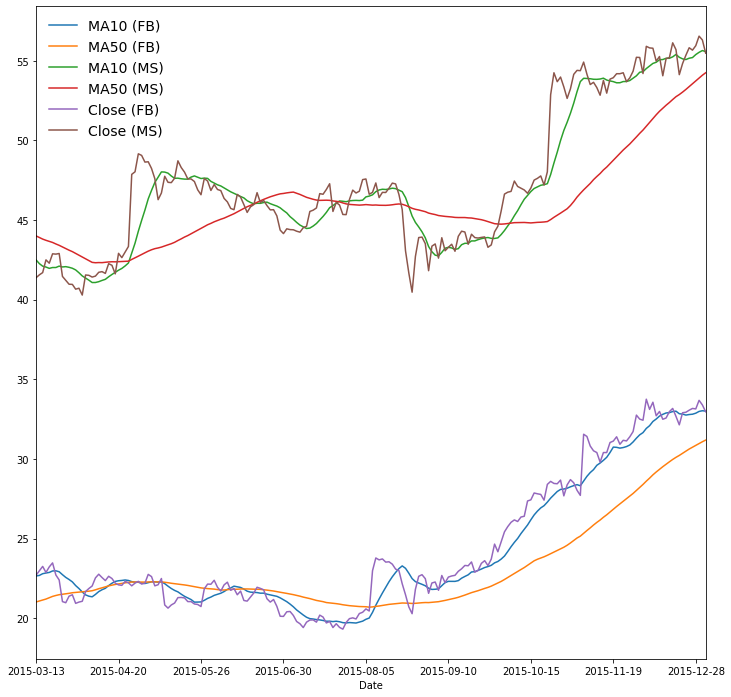

In [6]:
plt.figure(figsize=(12,12))
fbook['MA10'].loc['2015-01-01':'2015-12-31'].plot(label='MA10 (FB)')
fbook['MA50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50 (FB)')

msoft['MA10'].loc['2015-01-01':'2015-12-31'].plot(label='MA10 (MS)')
msoft['MA50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50 (MS)')


fbook['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close (FB)')
msoft['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close (MS)')

plt.legend(prop={'size': 14},frameon=False)
plt.show()

### Se suele decir que si la señal rápida es mayor que la señal lenta (MA(10) > MA(50)), el precio de las acciones debería subir en los próximos días. En cambio, para MA(10)<MA(50) el precio disminuye.

### Vamos a definir una variable "Shares" que será un indicador para ver si debemos mantener la acción que compremos o no. En caso afirmativo, Shares==1. Este valor se tomará cuando se cumpla la condición de que la señal rápida sea mayor que la seña lenta:

In [8]:
fbook['Shares'] = [1 if fbook.loc[i, 'MA10']>fbook.loc[i, 'MA50'] else 0 for i in fbook.index]
msoft['Shares'] = [1 if msoft.loc[i, 'MA10']>msoft.loc[i, 'MA50'] else 0 for i in msoft.index]

### Ahora podemos definir una variable que sea "Beneficio". Esta se calculará como la diferencia de precios entre el día $j$ y el día $j-1$.

### Primero creamos una nueva variable que es el precio del día siguiente:

In [10]:
fbook['Close_1'] = fbook['Close'].shift(-1)
msoft['Close_1'] = msoft['Close'].shift(-1)
fbook.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close_1
Date,,,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174,1,22.969999
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758,1,23.250000
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382,1,22.870001
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998,1,23.219999
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804,1,23.469999


In [16]:
fbook['Profit'] = [fbook.loc[j, 'Close_1'] - fbook.loc[j, 'Close'] if fbook.loc[j, 'Shares']==1 else 0 for j in fbook.index]
msoft['Profit'] = [msoft.loc[j, 'Close_1'] - msoft.loc[j, 'Close'] if msoft.loc[j, 'Shares']==1 else 0 for j in msoft.index]

fbook.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close_1,Profit
Date,,,,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174,1,22.969999,0.269998
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758,1,23.250000,0.280001
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382,1,22.870001,-0.379999
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998,1,23.219999,0.349998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804,1,23.469999,0.250000


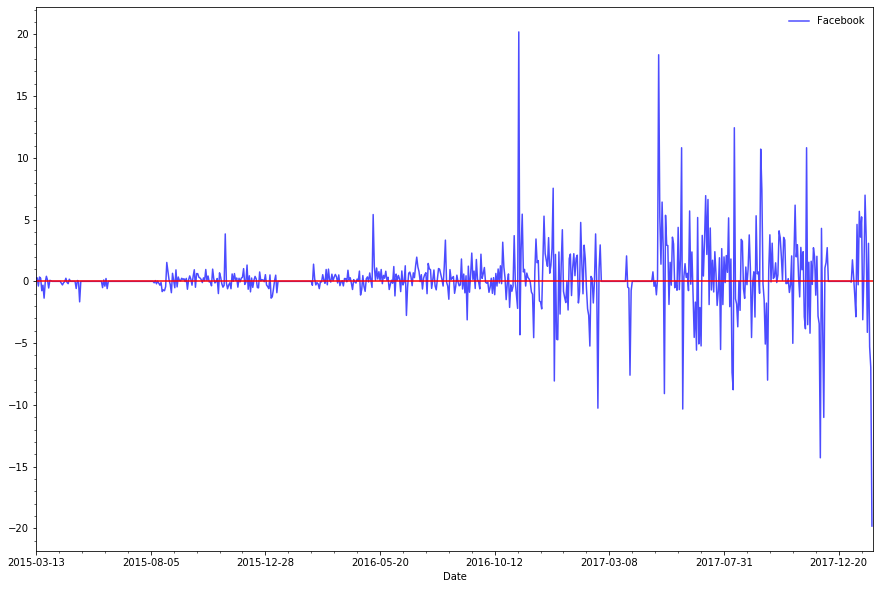

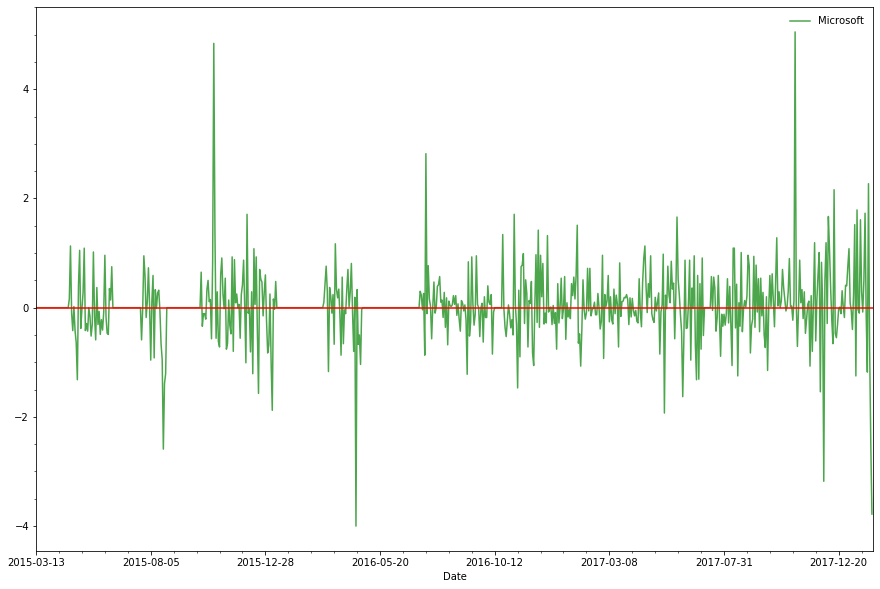

In [33]:
plt.figure(figsize=(15,10))
plt.minorticks_on()

fbook['Profit'].plot(label='Facebook',color='blue',alpha=0.7)
plt.axhline(y=0, color='red')
plt.legend(frameon=False)


plt.figure(figsize=(15,10))
plt.minorticks_on()

msoft['Profit'].plot(label='Microsoft',color='green',alpha=0.7)
plt.axhline(y=0, color='red')
plt.legend(frameon=False)

### Finalmente, introducimos una nueva variable que se llame "riqueza" (wealth) para ver cuánto dinero se gana.

In [34]:
msoft['wealth'] = msoft['Profit'].cumsum()
fbook['wealth'] = fbook['Profit'].cumsum()


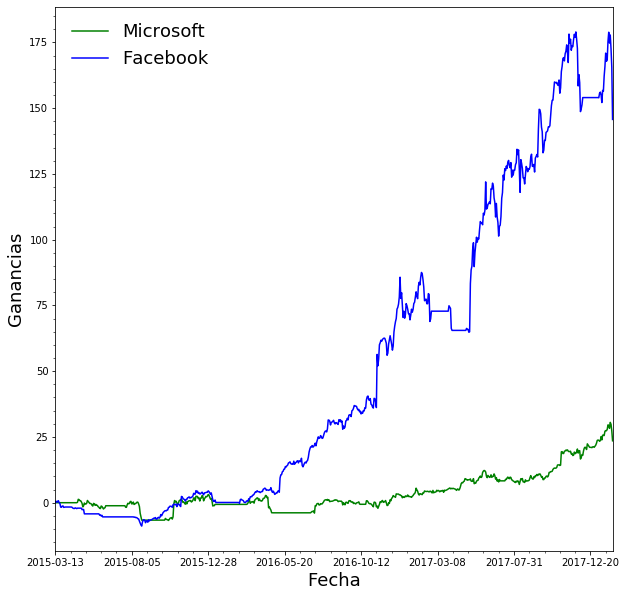

In [45]:
plt.figure(figsize=(10,10))
plt.minorticks_on()
msoft['wealth'].plot(label='Microsoft',color='green')
fbook['wealth'].plot(label='Facebook',color='blue')

plt.legend(prop={'size': 18},frameon=False)
plt.ylabel('Ganancias',fontsize=18)
plt.xlabel('Fecha',fontsize=18)

plt.show()